### Install & import dependencies

In [28]:
%pip install ndlib --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from custommodels.CascadeModel import CascadeModel
import random
import matplotlib.pyplot as plt


### Load data

In [30]:
path = "../data/loc-brightkite_edges.txt.gz"
G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)

### Threshold
Setup

In [31]:
model = CascadeModel(G)

config = mc.Configuration()
# How many nodes to infect initially
# you can also set individual nodes to be infected by adding a node configuration
# See https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html#parameters
config.add_model_parameter('fraction_infected', 0.01)

# Define the recovery probability

recover_probability = 0.1
threshold = 0.05
for n in G.nodes():
    config.add_node_configuration("threshold", n, threshold)
    config.add_node_configuration("recover_probability", n, recover_probability)

model.set_initial_status(config)

Simulation

In [32]:
# Simulation loop
iterations = 200
results = []
for _ in range(iterations):
    iteration_result = model.iteration()
    results.append(iteration_result)

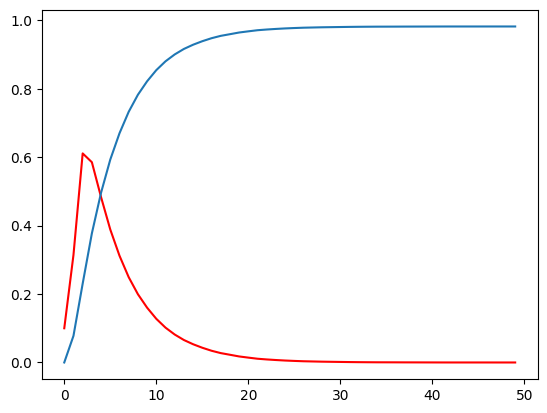

In [33]:
infected = []
removed = []

for i in range(len(results)):
    it = results[i]
    n_infected = sum(x == 1 for x in it["status"].values())
    infected.append(n_infected/len(G.nodes()))
    n_removed = sum(x == 2 for x in it["status"].values())
    removed.append(n_removed/len(G.nodes()))
plt.plot(infected, color="red")
plt.plot(removed)